## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

In [478]:
# Dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem tanımı
Bir perakende şirketi "ABC Private Limited", farklı kategorilerdeki çeşitli ürünlere karşı müşterinin satın alma davranışını (özellikle satın alma tutarını) anlamak istiyor. Geçen aya ait seçilmiş yüksek hacimli ürünler için çeşitli müşterilerin satın alma özetlerini paylaştılar.
Veri seti aynı zamanda müşteri demografik bilgilerini (age, gender, marital status, city_type, stay_in_current_city), ürün ayrıntılarını (product_id and product category) ve geçen aya ait toplam purchase_amount (satın alma tutarını) da içerir.

Şimdi, farklı ürünlere göre müşterilere kişiselleştirilmiş teklifler oluşturmalarına yardımcı olacak ve müşterinin çeşitli ürünlere göre satın alma miktarını tahmin edecek bir model oluşturmak istiyorlar.

In [479]:
# importing the dataset
df_train=pd.read_csv('BF_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [480]:
# importing the test data
df_test=pd.read_csv('BF_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [481]:
# Train and test datasını birleştirme
import pandas as pd

# df_train ve df_test veri çerçevelerini birleştirme
df = pd.concat([df_train, df_test], ignore_index=True)

# Birleştirilmiş veri çerçevesinin ilk birkaç satırını gösterme
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [482]:
# Veriye  genel bir bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [483]:
# Veri kümesindeki 'object' tipindeki veriyi tamsayı ('int') tipine dönüştürme
import pandas as pd

# df DataFrame olarak varsayılırsa
# İlk olarak, sütundaki değerlerden '+' işaretini kaldıralım
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

# Şimdi, sütunu tamsayıya dönüştürelim
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

# DataFrame'in bilgilerini tekrar kontrol edelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 71.7+ MB


In [484]:
# DataFrame içindeki sayısal verilerin istatistiksel özetine bakalım.
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,1.858247,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,1.288790,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [485]:
# Gereksiz alanları drop edelim
df.drop("User_ID", axis=1, inplace=True)

In [486]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969.0


In [487]:
# Gender'ı get_dummies yerine kendimiz de map edebiliriz
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4,0,8,NaN,NaN,7969.0


In [488]:
# Age nasıl bir değişken, ne yapmamız lazım?
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [489]:
# 'Age' sütununu kategorik değişkenlerden sayısal değerlere dönüştürme ve bu sayısal değerlere göre ikili (dummy) değişkenler oluşturma
pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [490]:
# Diğer bir encoding yöntemi
# Buradaki farklı yaş aralıkları aslında Black Friday'de farklı anlamlar ifade ediyor ise ona göre target encoding de yapılabilir.

from sklearn import preprocessing
 
# label_encoder nesnesi, kelime etiketlerini anlamak için nasıl kullanılacağını bilir.
label_encoder = preprocessing.LabelEncoder()
 
# 'species' sütunundaki etiketleri kodlayın.
df['Age'] = label_encoder.fit_transform(df['Age'])
 
# Benzersiz kodlanmış değerleri kontrol edin.
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [491]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969.0


In [492]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [493]:
import pandas as pd

# One-hot encoding uygulama
df_city = pd.get_dummies(df['City_Category'], prefix='City_Category')

# Dönüştürülmüş veri çerçevesini gösterme
df_city.head()

,City_Category_A,City_Category_B,City_Category_C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [494]:
# Ayrı ayrı ele aldıgımız kategorik degişkenleri df ile birleştirme
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969.0,False,False,True


In [495]:
# City_Category kategorik olanları drop ediyoruz.
df.drop('City_Category',axis=1,inplace=True)

In [496]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,6,16,4,0,8,NaN,NaN,7969.0,False,False,True


In [497]:
# Eksik değerlere bakalım.
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [498]:
# Eksik değerleri sırayla tamamlayalım.
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [499]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [500]:
import pandas as pd

# 'Product_Category_2' sütunundaki eksik değerleri mod ile dolduralım.
mode_value = df['Product_Category_2'].mode()[0]
df['Product_Category_2'].fillna(mode_value, inplace=True)

In [501]:
df['Product_Category_2'].isnull().sum()

0

In [502]:
# Product_category 3 eksik değerleri tamamlama
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [503]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [504]:
# Eksik değerleri yine mode ile tamamlayalım.
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [505]:
df['Product_Category_3'].isnull().sum()

0

In [506]:
df['Purchase'].isnull().sum()

233599

In [507]:
## Eksik değerleri yine mode ile tamamlayalım
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

In [508]:
df['Purchase'].isnull().sum()

0

In [509]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,True,False,False
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,False,False,True


In [510]:
# Satır ve sütun sayısına bakma
df.shape

(783667, 13)

### Stay_In_Current_City_Years'ı nasıl encode edelim?

In [511]:
import pandas as pd

# One-Hot Encoding uygulama
encoded_df = pd.get_dummies(df['Stay_In_Current_City_Years'], prefix='City_Years')

# Orijinal sütunu düşürme
df.drop('Stay_In_Current_City_Years', axis=1, inplace=True)

# One-Hot Encoding uygulanmış sütunları birleştirme
df = pd.concat([df, encoded_df], axis=1)

# Dönüştürülmüş veri çerçevesini gösterme
df.head()

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,City_Years_0,City_Years_1,City_Years_2,City_Years_3,City_Years_4
0,P00069042,0,0,10,0,3,8.0,16.0,8370.0,True,False,False,False,False,True,False,False
1,P00248942,0,0,10,0,1,6.0,14.0,15200.0,True,False,False,False,False,True,False,False
2,P00087842,0,0,10,0,12,8.0,16.0,1422.0,True,False,False,False,False,True,False,False
3,P00085442,0,0,10,0,12,14.0,16.0,1057.0,True,False,False,False,False,True,False,False
4,P00285442,1,6,16,0,8,8.0,16.0,7969.0,False,False,True,False,False,False,False,True


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product_ID          783667 non-null  object 
 1   Gender              783667 non-null  int64  
 2   Age                 783667 non-null  int64  
 3   Occupation          783667 non-null  int64  
 4   Marital_Status      783667 non-null  int64  
 5   Product_Category_1  783667 non-null  int64  
 6   Product_Category_2  783667 non-null  float64
 7   Product_Category_3  783667 non-null  float64
 8   Purchase            783667 non-null  float64
 9   City_Category_A     783667 non-null  bool   
 10  City_Category_B     783667 non-null  bool   
 11  City_Category_C     783667 non-null  bool   
 12  City_Years_0        783667 non-null  bool   
 13  City_Years_1        783667 non-null  bool   
 14  City_Years_2        783667 non-null  bool   
 15  City_Years_3        783667 non-nul

#### Şimdi biraz görsel analiz yapalım.

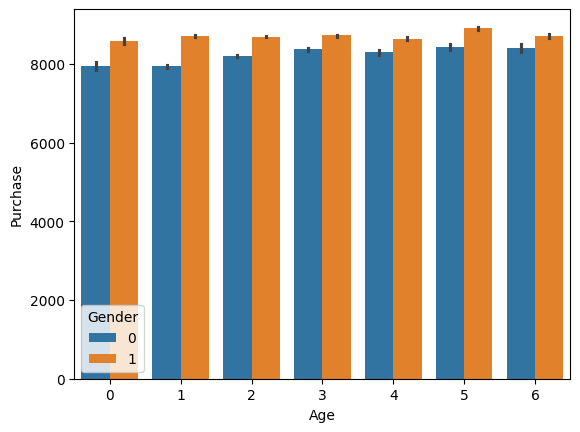

In [513]:
# Görselleştirme Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df);

##### Görselden elde ettiğimiz bilgileri yazalım.

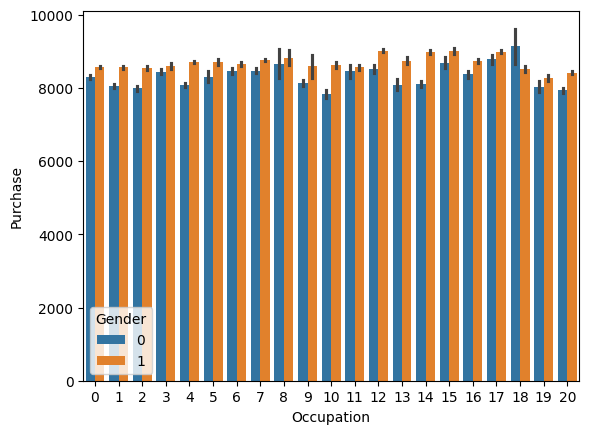

In [514]:
# Meslek sütununa göre satın alma sütununun görselleştirilmesi ve cinsiyet sütununu renklendirme
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df);

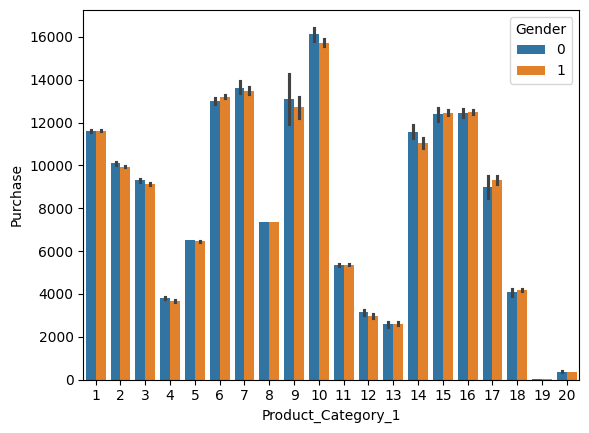

In [515]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df);

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

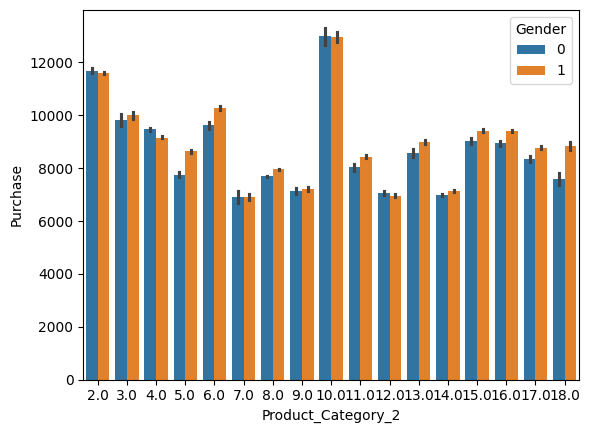

In [516]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

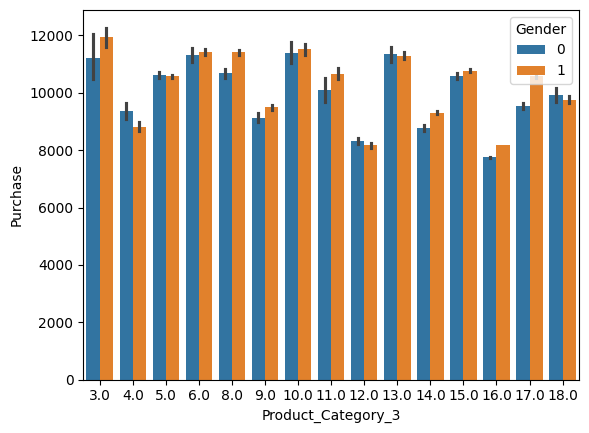

In [517]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [518]:
df.head()

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,City_Years_0,City_Years_1,City_Years_2,City_Years_3,City_Years_4
0,P00069042,0,0,10,0,3,8.0,16.0,8370.0,True,False,False,False,False,True,False,False
1,P00248942,0,0,10,0,1,6.0,14.0,15200.0,True,False,False,False,False,True,False,False
2,P00087842,0,0,10,0,12,8.0,16.0,1422.0,True,False,False,False,False,True,False,False
3,P00085442,0,0,10,0,12,14.0,16.0,1057.0,True,False,False,False,False,True,False,False
4,P00285442,1,6,16,0,8,8.0,16.0,7969.0,False,False,True,False,False,False,False,True


Product_ID de düşürülebilir.

In [519]:
# Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [520]:
df_train=df[~df['Purchase'].isnull()]

In [521]:
X=df_train.drop('Purchase',axis=1)

In [522]:
X.head()

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_A,City_Category_B,City_Category_C,City_Years_0,City_Years_1,City_Years_2,City_Years_3,City_Years_4
0,P00069042,0,0,10,0,3,8.0,16.0,True,False,False,False,False,True,False,False
1,P00248942,0,0,10,0,1,6.0,14.0,True,False,False,False,False,True,False,False
2,P00087842,0,0,10,0,12,8.0,16.0,True,False,False,False,False,True,False,False
3,P00085442,0,0,10,0,12,14.0,16.0,True,False,False,False,False,True,False,False
4,P00285442,1,6,16,0,8,8.0,16.0,False,False,True,False,False,False,False,True


In [523]:
X.shape

(783667, 16)

In [524]:
y=df_train['Purchase']

In [525]:
y.shape

(783667,)

In [526]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
783662     7011.0
783663     7011.0
783664     7011.0
783665     7011.0
783666     7011.0
Name: Purchase, Length: 783667, dtype: float64

In [527]:
# Veri setini eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [528]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [529]:
# Son olarak scaling yapma
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model çalışmaya hazır!!!